In [1]:
import numpy as np
import pyCalc as p
import random
np.random.seed(1)

#this shouldn't exist
l0 = p.var("function")
l1 = p.var("function")
l10 = p.var("function")
l2 = p.var("function")
l2_errorh = p.var("function")
l2_error = p.var("function")
sig0 = p.var("function")
sig1 = p.var("function")
l1_delta = p.var("function")
l2_delta = p.var("function")
hlp1 = p.var("function")
tmp1 = p.var("function")
hlp0 = p.var("function")
tmp0 = p.var("function")

xs = p.var("constant",np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ]                           
                               , dtype= float))
ys = p.var("constant", np.array([0,1,1,0], dtype=float))

weights = 2*np.random.random((3,4)) - 1
weights2 = 2*np.random.random((4,1)) - 1

ws0 = p.var("independent", np.array([3,4]))
ws1 = p.var("independent", np.array([4,1]))

l0.f(xs, ws0, "*")
l1.sf(l0, "sigmoid")

l10.f(ws1, l1, "*")
l2.sf(l10, "sigmoid")

l2_error.f(ys, l2, "-") #error function such as MSE

sig1.sf(l2, "sigmoid_r")#this should be a part of l2

l2_delta.f(sig1, l2_error, "rowwise") #it should do rowwise automatically if multiplication not possible
hlp1.f(l1,l2_delta, "rowwise")
tmp1.sf(hlp1, "rowsum") #add to ws1

sig0.sf(l1, "sigmoid_r")#this should be a part of l1

l2_errorh.sf(l2_delta, "transpose")
l1_delta.f(l2_errorh,ws1, "*")
tmp0.f(l1_delta,xs, "*") #add to ws0

In [2]:
g= []
for i in range(6000):
    t1 = weights2 + tmp1.value(dict([(ws0,weights), (ws1,weights2)]))
    t0 = weights + tmp0.value(dict([(ws0,weights), (ws1,weights2)])).T
    weights = t0
    weights2 = t1
    g.append(l2_error.value(dict([(ws0,weights), (ws1,weights2)])).tolist())

print(weights)
print(weights2)

[[  4.74516376  -2.53429148  -2.90011697   3.24280022]
 [-17.80386506   9.01975985   5.5366234  -12.74029483]
 [ -1.87463494   0.7824925    0.19676802  -0.74696667]]
[[-1.19447025]
 [ 4.00664822]
 [-5.06568816]
 [ 2.82538934]]


In [3]:
print(l2.value(dict([(ws0,weights), (ws1,weights2)])))
print(l2_error.value(dict([(ws0,weights), (ws1,weights2)])))

[[ 0.00701345  0.99483854  0.99662626  0.00628161]]
[[-0.00701345  0.00516146  0.00337374 -0.00628161]]


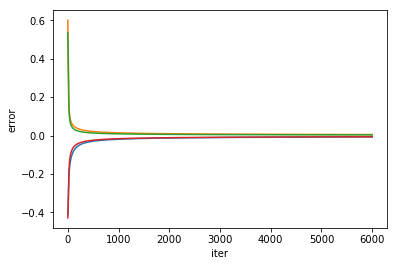

In [4]:
import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[g[j][i] for j in range(len(g))]for i in range(len(g[0]))]
for d in y_data:
    plt.plot(x_data, d)
plt.ylabel('error')
plt.xlabel('iter')
plt.show()

In [5]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
import time

In [6]:
out = 0
for i in range(10):
    a = time.time()
    for j in range(1000):
        l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
        l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
        l2_delta = (y - l2)*(l2*(1-l2))
        l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
        syn1 += l1.T.dot(l2_delta)
        syn0 += X.T.dot(l1_delta)
    b = time.time()
    out += b-a
print (out/1000)

0.000265129566192627


In [7]:
out = 0
for i in range(10):
    a = time.time()
    for i in range(1000):
        t1 = weights2 + tmp1.value(dict([(ws0,weights), (ws1,weights2)]))
        t0 = weights + tmp0.value(dict([(ws0,weights), (ws1,weights2)])).T
        weights = t0
        weights2 = t1
    b = time.time()
    out += b-a
print (out/1000)

0.0011549646854400635
